# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import shutil

from google.colab import files
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# STEP 0 - Download dataset dari Kaggle
import kagglehub
import os
import shutil

print("Mengunduh dataset dari Kaggle...")

path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")
print("Path dataset:", path)

files_in_path = os.listdir(path)
print("Isi folder dataset:", files_in_path)

csv_file = [f for f in files_in_path if f.endswith(".csv")][0]
source_path = os.path.join(path, csv_file)

RAW_FILENAME = "youtube_comment_raw.csv"
shutil.copy(source_path, RAW_FILENAME)

print("Dataset disimpan sebagai:", RAW_FILENAME)

Mengunduh dataset dari Kaggle...
Using Colab cache for faster access to the 'youtube-comments-dataset' dataset.
Path dataset: /kaggle/input/youtube-comments-dataset
Isi folder dataset: ['YoutubeCommentsDataSet.csv']
Dataset disimpan sebagai: youtube_comment_raw.csv


In [3]:
df = pd.read_csv("youtube_comment_raw.csv")
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
import os

os.listdir(path)

['YoutubeCommentsDataSet.csv']

In [5]:
csv_path = os.path.join(path, "YoutubeCommentsDataSet.csv")
df = pd.read_csv(csv_path)
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [6]:
os.makedirs("youtube_comment_raw", exist_ok=True)

raw_path = "youtube_comment_raw/youtube_comment_raw.csv"
shutil.copy(csv_path, raw_path)

print("File disimpan sebagai:", raw_path)

File disimpan sebagai: youtube_comment_raw/youtube_comment_raw.csv


In [7]:
df.shape

(18408, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [9]:
df.columns

Index(['Comment', 'Sentiment'], dtype='object')

In [10]:
df = df.rename(columns={
    "Comment": "text",
    "Sentiment": "sentiment"
})

In [11]:
df.columns

Index(['text', 'sentiment'], dtype='object')

In [12]:
df.isna().sum()

,0
text,44
sentiment,0


In [13]:
df.duplicated().sum()

np.int64(531)

In [14]:
TEXT_COL = "text"
LABEL_COL = "sentiment"

In [15]:
df.duplicated(subset=[TEXT_COL]).sum()

np.int64(536)

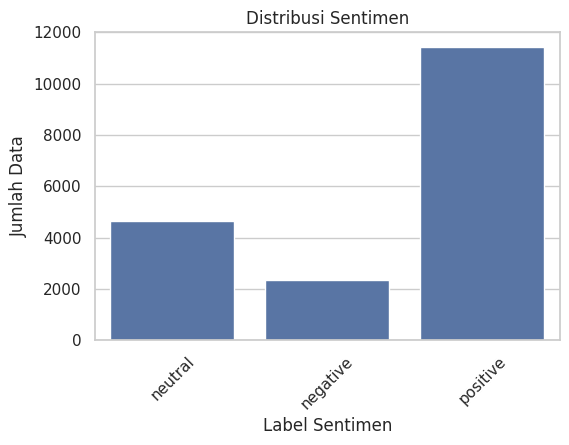

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=LABEL_COL)
plt.title("Distribusi Sentimen")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=45)
plt.show()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [17]:
TEXT_COL = "text"
LABEL_COL = "sentiment"

TEXT_COL, LABEL_COL

('text', 'sentiment')

In [18]:
df.isna().sum()

,0
text,44
sentiment,0


In [19]:
df["text_length"] = df[TEXT_COL].astype(str).str.len()
df["text_length"].describe()

,text_length
count,18408.000000
mean,177.136897
std,250.894504
min,2.000000
25%,66.000000
50%,113.000000
75%,201.000000
max,7847.000000


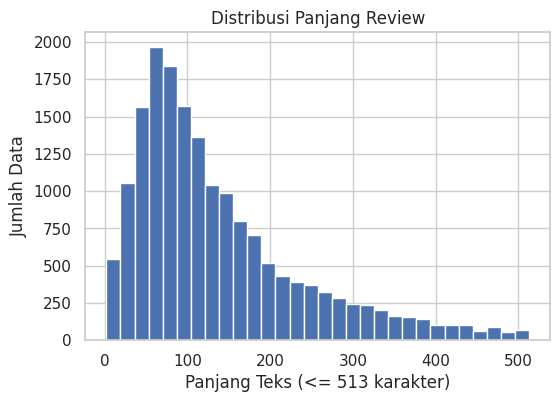

In [20]:
q95 = df["text_length"].quantile(0.95)

plt.figure(figsize=(6, 4))
plt.hist(df.loc[df["text_length"] <= q95, "text_length"], bins=30)
plt.xlabel(f"Panjang Teks (<= {int(q95)} karakter)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Panjang Review")
plt.show()

In [21]:
df["text_length"] = df[TEXT_COL].astype(str).str.len()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
df = df.dropna(subset=[TEXT_COL, LABEL_COL])
df = df.drop_duplicates()
df.shape

(17874, 3)

In [23]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_review"] = df[TEXT_COL].astype(str).apply(clean_text)
df[[TEXT_COL, "clean_review"]].head()

,text,clean_review
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in required a b...
1,here in nz 50 of retailers don’t even have con...,here in nz of retailers don t even have contac...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesn t take app...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...


In [24]:
df[[TEXT_COL, "clean_review"]].head()

,text,clean_review
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in required a b...
1,here in nz 50 of retailers don’t even have con...,here in nz of retailers don t even have contac...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesn t take app...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sentiment_label"] = le.fit_transform(df[LABEL_COL])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}

In [26]:
final_df = df[["clean_review", "sentiment_label"]]
final_df.head()

,clean_review,sentiment_label
0,lets not forget that apple pay in required a b...,1
1,here in nz of retailers don t even have contac...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn t take app...,0
4,apple pay is so convenient secure and easy to ...,2


In [27]:
os.makedirs("preprocessing/youtube_comment_preprocessing", exist_ok=True)

preprocessed_path = (
    "preprocessing/youtube_comment_preprocessing/"
    "youtube_comment_preprocessed.csv"
)

final_df.to_csv(preprocessed_path, index=False)
print("File hasil preprocessing disimpan di:", preprocessed_path)

File hasil preprocessing disimpan di: preprocessing/youtube_comment_preprocessing/youtube_comment_preprocessed.csv


In [28]:
final_df.to_csv(
    "youtube_comment_preprocessing.csv",
    index=False
)

In [30]:
!zip -r youtube_comment_raw.zip youtube_comment_raw

  adding: youtube_comment_raw/ (stored 0%)
  adding: youtube_comment_raw/youtube_comment_raw.csv (deflated 64%)


In [31]:
from google.colab import files
files.download("youtube_comment_raw.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from google.colab import files
files.download("youtube_comment_preprocessing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import os
import pandas as pd

# Tentukan nama folder dan file sesuai standar tugas Anda
DATA_DIR = "youtube_comment_preprocessing"
DATA_FILE = "youtube_comment_preprocessed.csv"
DATA_PATH = os.path.join(DATA_DIR, DATA_FILE)

# 1. Buat folder jika belum ada
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
    print(f"Folder '{DATA_DIR}' berhasil dibuat.")

# 2. Simpan dataframe 'df' ke folder tersebut
# Kode ini akan memeriksa apakah variabel 'df' (dari Kriteria 1) ada di memori Colab
if 'df' in locals() or 'df' in globals():
    try:
        # Pastikan kolom sesuai dengan kriteria 1 Anda (text & sentiment)
        df.to_csv(DATA_PATH, index=False)
        print(f"File berhasil disimpan di: {DATA_PATH}")
    except Exception as e:
        print(f"Terjadi kesalahan saat menyimpan: {e}")
else:
    print("Error: Variabel 'df' tidak ditemukan!")

Folder 'youtube_comment_preprocessing' berhasil dibuat.
File berhasil disimpan di: youtube_comment_preprocessing/youtube_comment_preprocessed.csv


In [36]:
!ls

preprocessing			   youtube_comment_raw
sample_data			   youtube_comment_raw.csv
youtube_comment_preprocessing	   youtube_comment_raw.zip
youtube_comment_preprocessing.csv


In [41]:
import pandas as pd
import os

# Nama file script
script_name = "automate_mirananda.py"

content = """
import pandas as pd
import os

def run_preprocessing():
    # 1. Tentukan folder sumber (raw) dan tujuan (preprocessing)
    raw_dir = 'namadataset_raw'
    output_dir = 'preprocessing/namadataset_preprocessing'

    # Buat folder jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f" Membuat folder: {output_dir}")

    # 2. Path file (Sesuaikan dengan nama file CSV mentah Anda)
    # Kita cari file csv apapun di dalam folder raw
    try:
        raw_files = [f for f in os.listdir(raw_dir) if f.endswith('.csv')]
        if not raw_files:
            print("Tidak ada file CSV di folder namadataset_raw")
            return

        raw_path = os.path.join(raw_dir, raw_files[0])
        print(f"Membaca data dari: {raw_path}")
        df = pd.read_csv(raw_path)

        # 3. PROSES PREPROCESSING (Sesuai eksperimen Mirananda)
        # Menyeragamkan kolom
        df.columns = [col.lower() for col in df.columns]

        # Contoh cleaning: menghapus baris kosong
        df = df.dropna()

        # 4. Simpan hasil
        output_path = os.path.join(output_dir, 'youtube_preprocessed.csv')
        df.to_csv(output_path, index=False)
        print(f"BERHASIL! Data tersimpan di: {output_path}")
        print(f"Jumlah data: {len(df)} baris")

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

if __name__ == '__main__':
    run_preprocessing()
"""

# Menyimpan kodingan di atas menjadi file .py
with open(script_name, "w") as f:
    f.write(content)

print(f"File {script_name} berhasil dibuat.")

File automate_mirananda.py berhasil dibuat.


In [43]:
import os
import pandas as pd

# 1. Buat folder mentah (raw)
if not os.path.exists('namadataset_raw'):
    os.makedirs('namadataset_raw')
    print("Folder 'namadataset_raw' berhasil dibuat.")

# 2. Masukkan data Anda ke dalam folder tersebut
# Saya asumsikan Anda sudah punya variabel 'df' dari cell sebelumnya
try:
    df.to_csv('namadataset_raw/data.csv', index=False)
    print("Data mentah berhasil disimpan ke 'namadataset_raw/data.csv'")
except NameError:
    print("Variabel 'df' tidak ditemukan! Jalankan dulu cell Kriteria 1 Anda yang memuat data.")

Folder 'namadataset_raw' berhasil dibuat.
Data mentah berhasil disimpan ke 'namadataset_raw/data.csv'


In [44]:
!python automate_mirananda.py

Membaca data dari: namadataset_raw/data.csv
BERHASIL! Data tersimpan di: preprocessing/namadataset_preprocessing/youtube_preprocessed.csv
Jumlah data: 17651 baris


In [45]:
%%writefile automate_Mirananda.py
import pandas as pd
import os

def run_preprocessing():
    # 1. Tentukan folder sumber (raw) dan tujuan (preprocessing)
    raw_dir = 'namadataset_raw'
    output_dir = 'preprocessing/namadataset_preprocessing'

    # Buat folder tujuan jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Membuat folder: {output_dir}")

    # 2. Cek apakah folder raw ada
    if not os.path.exists(raw_dir):
        print(f"Error: Folder '{raw_dir}' tidak ditemukan!")
        return

    # 3. Cari file CSV di folder raw
    try:
        raw_files = [f for f in os.listdir(raw_dir) if f.endswith('.csv')]
        if not raw_files:
            print(f"Tidak ada file CSV di folder {raw_dir}")
            return

        raw_path = os.path.join(raw_dir, raw_files[0])
        print(f"Membaca data dari: {raw_path}")
        df = pd.read_csv(raw_path)

        # 4. PROSES PREPROCESSING (Sesuai eksperimen Anda)
        # Menyeragamkan kolom menjadi text dan sentiment
        df.columns = [col.lower() for col in df.columns]
        df = df.dropna() # Hapus baris kosong

        # 5. Simpan hasil ke folder preprocessing
        output_path = os.path.join(output_dir, 'youtube_preprocessed.csv')
        df.to_csv(output_path, index=False)
        print(f"BERHASIL! Data tersimpan di: {output_path}")

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

if __name__ == '__main__':
    run_preprocessing()

Writing automate_Mirananda.py
